Name: Tien-Ching Hsieh  
Github Username: hsieh2000  
USC ID: 2642366337  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter



## 1(a)

In [2]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
df_train = df.sample(frac=0.7, random_state=42, )
df_test = df[~df.index.isin(df_train.index)]

In [4]:
df_train_X = df_train.iloc[:, :-4]
df_train_y = df_train.iloc[:, -4:-1]

df_test_X = df_test.iloc[:, :-4]
df_test_y = df_test.iloc[:, -4:-1]


In [5]:
df_train_X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.341701,0.008463,-0.290680,0.016310,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.142909,-0.209932,0.285255,0.103722,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.016052,-0.028317,-0.102525,-0.005594,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.374639,0.012647,-0.317314,-0.023621,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.402628,-0.110486,-0.306343,0.082182,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,1.0,-0.199469,0.560605,0.528894,0.261280,0.308324,0.078548,-0.111152,-0.052433,0.083926,...,0.050593,0.042922,-0.112277,0.004823,0.110200,0.006975,0.002524,0.005663,-0.025855,0.031765
4470,1.0,0.143984,0.167472,0.574652,0.235745,0.083787,-0.091411,-0.012954,0.173614,-0.026243,...,0.231500,-0.278516,-0.226757,0.244491,0.259515,-0.110291,-0.226197,-0.103499,0.150326,0.214336
891,1.0,0.264793,0.000276,0.401815,0.480250,0.234050,-0.197399,-0.249067,0.117561,0.242193,...,-0.009119,0.181912,0.121719,-0.100493,-0.133644,0.041198,0.128915,-0.019947,-0.119334,-0.076849
2793,1.0,0.301851,0.251113,0.521005,0.207875,0.188435,-0.090052,-0.064887,0.169501,-0.050759,...,0.408540,-0.142526,-0.277716,0.178983,0.195275,-0.062219,-0.062185,-0.061390,0.076945,0.144903


## 1(b)  
### i

Exact match metric and Hamming loss are both for mult-label classification.

Exact match metric: the function calculates subset accuracy meaning the predicted set of labels should exact match with the true set of label, which is also called accuracy score.  
Hamming loss: The fraction of the wrong labels to the total number of label.

### ii

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, hamming_loss, make_scorer, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


Train a SVM for each of the labels => in single label classification hamming loss == 1 - accuracy score.

In [7]:
def run_gridcv_single_label(X_train, y_train, X_test, y_test, kernel, param_grid, scoring, k_fold = 10, refit = True):
    model = SVC(kernel=kernel, decision_function_shape = 'ovr', random_state = 42)
    gridcv = GridSearchCV(model, param_grid, scoring = scoring, cv = k_fold, refit = True)
    gridcv.fit(X_train, y_train)
    print(f'Kernel: {kernel}')
    print(f'best model: {gridcv.best_estimator_}')

    print(f'mean_test_score: {gridcv.cv_results_["mean_test_score"]}')

    y_predict = gridcv.predict(X_test)

    print(f'accuracy score: {accuracy_score(y_test, y_predict)}')
    print(f'hamming loss: {1 - accuracy_score(y_test, y_predict)}')

    print(classification_report(y_test, y_predict))
    return gridcv

    

In [8]:
param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10, 100, 1000],
    # 'kernel': [],
}

# scoring = {'accuracy score': make_scorer(accuracy_score), 'hamming loss': make_scorer(hamming_loss)}
model = SVC(kernel='rbf', decision_function_shape = 'ovr', random_state = 42)
k_fold = KFold(n_splits=10, shuffle = True)



In [9]:
for label in ['Family', 'Genus', 'Species']:
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])

    print(f'Label: {label}')
    result = run_gridcv_single_label(train_X, 
        train_y, 
        test_X, 
        test_y, 
        'rbf', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )

Label: Family
Kernel: rbf
best model: SVC(C=10, gamma=1, random_state=42)
mean_test_score: [0.61498509 0.61538191 0.86060739 0.782574   0.61498509 0.61498509
 0.61975173 0.85981137 0.95849703 0.97617154 0.71387232 0.61498509
 0.85861932 0.93844552 0.98411397 0.9870945  0.79071957 0.62570687
 0.92692851 0.96703588 0.99165996 0.98768973 0.80342627 0.62789099
 0.94698121 0.98212826 0.9902691  0.98768973 0.80342627 0.62789099
 0.97061007 0.98510721 0.9902691  0.98768973 0.80342627 0.62789099]
accuracy score: 0.9911996294580825
hamming loss: 0.008800370541917513
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.99      1.00      1.00       163
           2       0.99      0.98      0.99       658
           3       0.99      0.99      0.99      1323

    accuracy                           0.99      2159
   macro avg       0.96      0.96      0.96      2159
weighted avg       0.99      0.99      0.99      2159

L

In [10]:
print("standardized data")
for label in ['Family', 'Genus', 'Species']:
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])

    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    print(f'Label: {label}')
    result = run_gridcv_single_label(
        train_X, 
        train_y, 
        test_X, 
        test_y, 
        'rbf', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )


standardized data
Label: Family
Kernel: rbf
best model: SVC(C=100, gamma=0.01, random_state=42)
mean_test_score: [0.83577898 0.84611103 0.63880487 0.61497483 0.61497483 0.61497483
 0.94459434 0.97418584 0.74524007 0.61835219 0.61497483 0.61497483
 0.96683826 0.98888021 0.90210523 0.65826667 0.61636569 0.61497483
 0.98590284 0.98967465 0.90925203 0.66919081 0.61716053 0.61497483
 0.98987504 0.98967465 0.90925203 0.66919081 0.61716053 0.61497483
 0.98888139 0.98967465 0.90925203 0.66919081 0.61716053 0.61497483]
accuracy score: 0.9911996294580825
hamming loss: 0.008800370541917513
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.99      1.00      0.99       163
           2       0.99      0.98      0.99       658
           3       0.99      1.00      0.99      1323

    accuracy                           0.99      2159
   macro avg       0.96      0.98      0.97      2159
weighted avg       0.99      0.99 

### iii

In [11]:
param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000],
}
k_fold = KFold(n_splits=10, shuffle = True)

# scoring = {'accuracy score': make_scorer(accuracy_score), 'hamming loss': make_scorer(hamming_loss)}


In [12]:
for label in ['Family', 'Genus', 'Species']:
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])

    print(f'Label: {label}')
    result = run_gridcv_single_label(train_X, 
        train_y, 
        test_X, 
        test_y, 
        'linear', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )

Label: Family
Kernel: linear
best model: SVC(C=100, kernel='linear', random_state=42)
mean_test_score: [0.82088974 0.92018011 0.93784949 0.94579152 0.94758    0.94519865]
accuracy score: 0.9564613246873552
hamming loss: 0.04353867531264477
              precision    recall  f1-score   support

           0       0.46      0.87      0.60        15
           1       0.92      0.95      0.93       163
           2       0.96      0.92      0.94       658
           3       0.97      0.98      0.97      1323

    accuracy                           0.96      2159
   macro avg       0.83      0.93      0.86      2159
weighted avg       0.96      0.96      0.96      2159

Label: Genus
Kernel: linear
best model: SVC(C=100, kernel='linear', random_state=42)
mean_test_score: [0.71682603 0.91123655 0.94996055 0.96544937 0.96544976 0.9640589 ]
accuracy score: 0.9731357109773043
hamming loss: 0.026864289022695664
              precision    recall  f1-score   support

           0       0.98      0

In [13]:
print("standardized data")
for label in ['Family', 'Genus', 'Species']:
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])
    
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    print(f'Label: {label}')
    result = run_gridcv_single_label(train_X, 
        train_y, 
        test_X, 
        test_y, 
        'linear', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )

standardized data
Label: Family
Kernel: linear
best model: SVC(C=1, kernel='linear', random_state=42)
mean_test_score: [0.9392439  0.94242127 0.94877402 0.94817681 0.94738316 0.94797879]
accuracy score: 0.9564613246873552
hamming loss: 0.04353867531264477
              precision    recall  f1-score   support

           0       0.48      0.87      0.62        15
           1       0.92      0.94      0.93       163
           2       0.96      0.92      0.94       658
           3       0.97      0.98      0.97      1323

    accuracy                           0.96      2159
   macro avg       0.83      0.93      0.87      2159
weighted avg       0.96      0.96      0.96      2159

Label: Genus
Kernel: linear
best model: SVC(C=0.1, kernel='linear', random_state=42)
mean_test_score: [0.9428102  0.96544937 0.96525174 0.96306526 0.96187557 0.96147835]
accuracy score: 0.9712830013895322
hamming loss: 0.028716998610467837
              precision    recall  f1-score   support

           0  

### iv

In [10]:
from imblearn.over_sampling import SMOTE


In [15]:
param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000],
}
k_fold = KFold(n_splits=10, shuffle = True)

In [16]:

for label in ['Family', 'Genus', 'Species']:
    
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])

    smote = SMOTE()
    train_X, train_y = smote.fit_resample(train_X, train_y)
    print(f'SMOTE: {Counter(train_y)}')
    
    print(f'Label: {label}')
    result = run_gridcv_single_label(
        train_X, 
        train_y, 
        test_X, 
        test_y, 
        'linear', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )


SMOTE: Counter({np.int64(3): 3097, np.int64(2): 3097, np.int64(1): 3097, np.int64(0): 3097})
Label: Family
Kernel: linear
best model: SVC(C=1000, kernel='linear', random_state=42)
mean_test_score: [0.89029723 0.92904448 0.95431096 0.96359361 0.96593434 0.96641886]
accuracy score: 0.9495136637332098
hamming loss: 0.05048633626679022
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        15
           1       0.85      0.98      0.91       163
           2       0.95      0.93      0.94       658
           3       0.98      0.95      0.97      1323

    accuracy                           0.95      2159
   macro avg       0.79      0.97      0.84      2159
weighted avg       0.96      0.95      0.95      2159

SMOTE: Counter({np.int64(0): 2898, np.int64(3): 2898, np.int64(1): 2898, np.int64(2): 2898, np.int64(7): 2898, np.int64(4): 2898, np.int64(6): 2898, np.int64(5): 2898})
Label: Genus
Kernel: linear
best model: SVC(C=1000, kernel='li

In [8]:
param_grid = {
    'C': [ 0.01, 1, 100, 1000],
}
k_fold = KFold(n_splits=10, shuffle = True)

In [11]:
print("standardized data")
for label in ['Family', 'Genus', 'Species']:
    
    train_X = df_train_X.copy()
    test_X = df_test_X.copy()

    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(df_train_y[label])
    test_y = label_encoder.transform(df_test_y[label])

    smote = SMOTE()
    train_X, train_y = smote.fit_resample(train_X, train_y)
    print(f'SMOTE: {Counter(train_y)}')

    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)
    
    print(f'Label: {label}')
    result = run_gridcv_single_label(
        train_X, 
        train_y, 
        test_X, 
        test_y, 
        'linear', 
        param_grid, 
        'accuracy', 
        k_fold = k_fold, 
        refit = True
    )


standardized data
SMOTE: Counter({np.int64(3): 3097, np.int64(2): 3097, np.int64(1): 3097, np.int64(0): 3097})
Label: Family
Kernel: linear
best model: SVC(C=1000, kernel='linear', random_state=42)
mean_test_score: [0.95414999 0.9658548  0.96690397 0.96714604]
accuracy score: 0.952755905511811
hamming loss: 0.047244094488189003
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        15
           1       0.86      0.98      0.92       163
           2       0.95      0.94      0.94       658
           3       0.98      0.96      0.97      1323

    accuracy                           0.95      2159
   macro avg       0.80      0.97      0.85      2159
weighted avg       0.96      0.95      0.95      2159

SMOTE: Counter({np.int64(0): 2898, np.int64(3): 2898, np.int64(1): 2898, np.int64(2): 2898, np.int64(7): 2898, np.int64(4): 2898, np.int64(6): 2898, np.int64(5): 2898})
Label: Genus
Kernel: linear
best model: SVC(C=100, kernel='linear'

## 2 Monte-Carlo Simulation

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 2(a)

In [13]:
df.iloc[:, :-4]

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [18]:
def get_best_k(K_range, X):
    best_k = min(K_range)
    max_score = 0
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        clusters = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, clusters)
        if silhouette_avg > max_score:
            best_k = k
            max_score = silhouette_avg

    print(f'the best K = {best_k}')
    return best_k

In [ ]:
def majority_label(best_k, clusters, Y):
    cluster_major = pd.DataFrame(columns=Y.columns)
    for c in range(best_k):
        index_, = np.where(clusters == c)
        cluster_samples = Y.iloc[index_, :]
        row = []
        for label in Y.columns:
            major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(major)
        cluster_major.loc[c] = row
    return cluster_major


In [20]:
def calculate_hamming_loss_dist(cluster_major, cluster_labels, Y):
    missing_labels = 0
    for c in range(len(cluster_major)):
        index_, = np.where(cluster_labels == c)
        for label in Y.loc[index_].values:
            miss = (label != cluster_major.loc[c].values)
            missing_labels += np.sum(miss)

    hamming_dist = missing_labels/Y.shape[0]
    hamming_loss = missing_labels/(Y.shape[0]*Y.shape[1])
    
    return hamming_dist, hamming_loss

## 2(b)

In [21]:
hamming_dist = []
hamming_loss = []
for i in range(50):
    print(f'iteration: {i+1}' )
    best_k = get_best_k(range(2,51), df.iloc[:, :-4])
    kmeans = KMeans(n_clusters=best_k)
    clusters = kmeans.fit_predict(df.iloc[:, :-4])
    cluster_major = majority_label(best_k, clusters, df.iloc[:, -4:-1])
    print(cluster_major)
    dist, loss = calculate_hamming_loss_dist(cluster_major, clusters, df.iloc[:, -4:-1])
    hamming_dist.append(dist)
    hamming_loss.append(loss)

    print(f'hamming distance: {dist}\nhamming loss: {loss}\n')

iteration: 1
the best K = 3
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas       HypsiboasCordobae
hamming distance: 0.8903405142460041
hamming loss: 0.29678017141533475

iteration: 2
the best K = 4
            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1          Hylidae  Hypsiboas    HypsiboasCinerascens
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3  Leptodactylidae  Adenomera          AdenomeraAndre
hamming distance: 0.7011813759555247
hamming loss: 0.23372712531850823

iteration: 3
the best K = 6
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2          Hylidae  Hypsiboas       HypsiboasCordobae
3  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
4          Hylid

## 2(c)

In [ ]:
pd.DataFrame(
    {
        "average of hamming distance": [np.mean(hamming_dist)],
        "std devation of hamming distance": [np.std(hamming_dist)],
        "average of hamming loss": [np.mean(hamming_loss)],
        "std devation of hamming loss": [np.std(hamming_loss)],
        "average of hamming score": [1 - np.mean(hamming_loss)],
        "std devation of hamming score": [np.std(hamming_loss)]
    })


,average of hamming distance,std devation of hamming distance,average of hamming loss,std devation of hamming loss,average of hamming score,std devation of hamming score
0,0.7353,0.102765,0.2451,0.034255,0.7549,0.034255


## ISLR 12.6.2

In [ ]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])
dist = squareform(dissimilarity_matrix)

In [34]:
print(dist)

[0.3  0.4  0.7  0.5  0.8  0.45]


## (a)

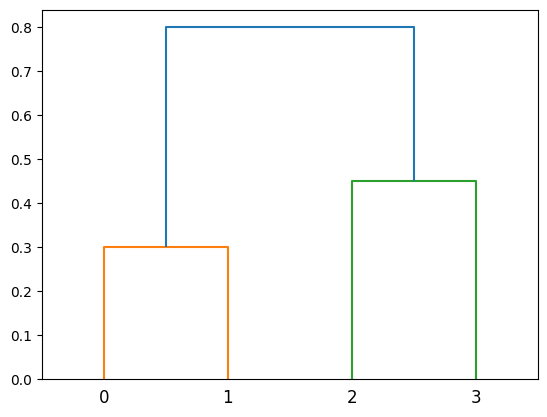

In [35]:
z = linkage(dist, "complete")
dendrogram(z, labels=["0", "1", "2", "3"])
plt.show()

## (b)

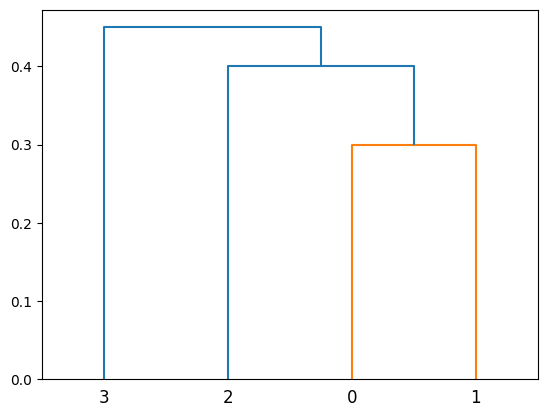

In [36]:
z = linkage(dist, "single")
dendrogram(z, labels=["0", "1", "2", "3"])
plt.show()

## (c)

{0, 1}  
{2, 3}

## (d)  


{0, 1, 2}  
{3}

## (e)

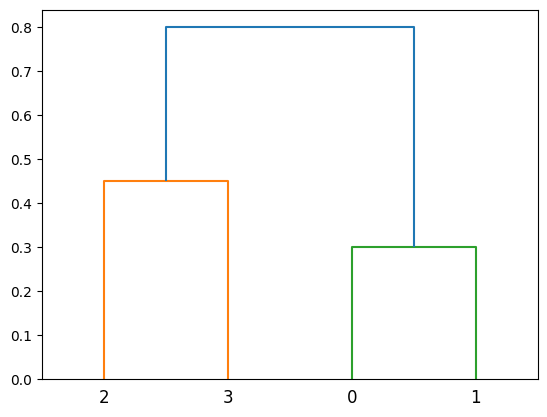

In [45]:
dendrogram(
    [[2.  , 3.  , 0.45, 2.  ],
    [0.  , 1.  , 0.3 , 2.  ],
    [4.  , 5.  , 0.8 , 4.  ]]
    ,labels=["0", "1", "2", "3"])
plt.show()